In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [29]:


df = pd.read_csv('Energy_components.csv')




In [30]:
df.head()

,quantity,time,id
0,58.627513,2024-09-30T22:51:54.857Z,66fb2b8a0f484d59837dbf09
1,84.041972,2024-09-30T22:52:04.858Z,66fb2b940f484d59837dbf0c
2,26.689434,2024-09-30T22:52:14.858Z,66fb2b9e0f484d59837dbf10
3,78.733162,2024-09-30T22:52:24.859Z,66fb2ba80f484d59837dbf19
4,13.199170,2024-09-30T22:52:34.859Z,66fb2bb20f484d59837dbf1f


In [31]:
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')



In [33]:
scaler = MinMaxScaler()
df['quantity_normalized'] = scaler.fit_transform(data[['quantity']])

In [34]:
sequence_length = 10
sequences = []
for i in range(len(df) - sequence_length):
    seq = df['quantity_normalized'].values[i:i + sequence_length]
    sequences.append(seq)

sequences = np.array(sequences)

In [35]:
X_train, X_test = train_test_split(sequences, test_size=0.2, random_state=42)

In [36]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [37]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))  # Predict the next value in the sequence
model.compile(optimizer='adam', loss='mse')

c:\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.fit(X_train, X_train[:, -1, :], epochs=10, batch_size=32, validation_data=(X_test, X_test[:, -1, :]))

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - loss: 0.2700 - val_loss: 0.2640
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2103 - val_loss: 0.1945
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1461 - val_loss: 0.1284
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1007 - val_loss: 0.0770
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0773 - val_loss: 0.0670
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0770 - val_loss: 0.0645
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0719 - val_loss: 0.0683
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0738 - val_loss: 0.0672
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0721 - val_loss: 0.0644
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0651 - val_loss: 0.0635


In [39]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


In [40]:
threshold = 0.05  
anomalies = np.abs(predictions - X_test[:, -1, :]) > threshold

In [41]:
print(f"Number of anomalies detected: {np.sum(anomalies)}")

Number of anomalies detected: 43


In [42]:
anomalous_indices = np.where(anomalies)[0]

In [43]:

original_test_indices = np.arange(sequence_length, len(df))[-len(X_test):]


In [44]:

anomalous_rows = df.iloc[original_test_indices[anomalous_indices]]

In [45]:
print("Anomalous Rows:")
print(anomalous_rows[['time', 'quantity']])

Anomalous Rows:
                                time   quantity
208 2024-10-01 01:04:28.957000+00:00  63.090708
209 2024-10-01 01:04:38.959000+00:00  55.998104
210 2024-10-01 01:04:48.959000+00:00  76.551293
211 2024-10-01 01:04:58.959000+00:00  31.964423
213 2024-10-01 01:05:18.960000+00:00  63.871272
214 2024-10-01 01:05:28.960000+00:00  24.166713
216 2024-10-01 01:05:48.961000+00:00  48.939124
217 2024-10-01 01:05:58.962000+00:00  10.646309
218 2024-10-01 01:06:08.962000+00:00  46.603764
219 2024-10-01 01:06:18.963000+00:00  23.445550
220 2024-10-01 01:06:28.962000+00:00  32.015623
221 2024-10-01 01:06:38.963000+00:00  50.749110
222 2024-10-01 01:06:48.963000+00:00  75.377143
223 2024-10-01 01:06:58.965000+00:00  51.917860
224 2024-10-01 01:07:08.965000+00:00  71.775817
225 2024-10-01 01:07:18.967000+00:00  15.268625
226 2024-10-01 01:07:28.967000+00:00  90.272599
227 2024-10-01 01:07:38.969000+00:00   9.579084
228 2024-10-01 01:07:48.968000+00:00  57.604163
229 2024-10-01 01:07:58.

c:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


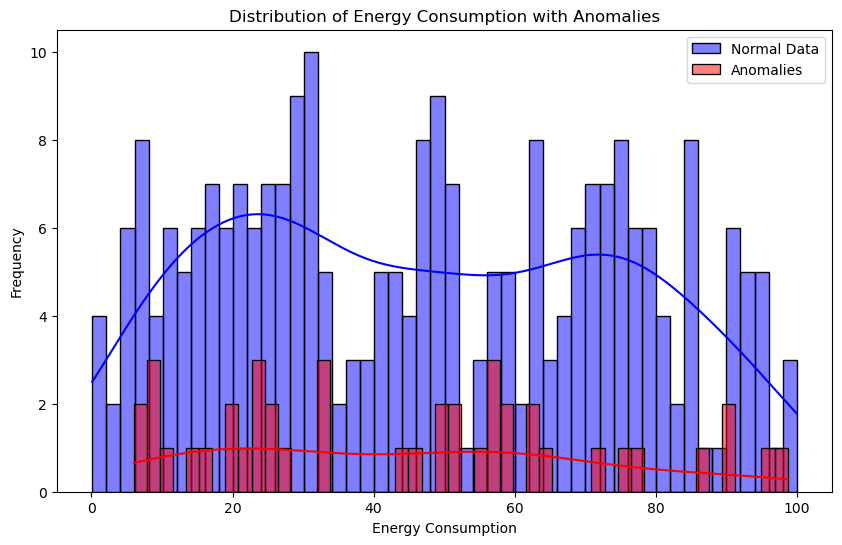

In [47]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['quantity'], bins=50, color='blue', kde=True, label='Normal Data')
sns.histplot(anomalous_rows['quantity'], bins=50, color='red', kde=True, label='Anomalies')

plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.title('Distribution of Energy Consumption with Anomalies')
plt.legend()
plt.show()


In [49]:
# Print the timestamps of anomalies
anomalous_timestamps = anomalous_rows['time']

print("Timestamps with Anomalies:")
for timestamp in anomalous_timestamps:
    print(timestamp)


Timestamps with Anomalies:
2024-10-01 01:04:28.957000+00:00
2024-10-01 01:04:38.959000+00:00
2024-10-01 01:04:48.959000+00:00
2024-10-01 01:04:58.959000+00:00
2024-10-01 01:05:18.960000+00:00
2024-10-01 01:05:28.960000+00:00
2024-10-01 01:05:48.961000+00:00
2024-10-01 01:05:58.962000+00:00
2024-10-01 01:06:08.962000+00:00
2024-10-01 01:06:18.963000+00:00
2024-10-01 01:06:28.962000+00:00
2024-10-01 01:06:38.963000+00:00
2024-10-01 01:06:48.963000+00:00
2024-10-01 01:06:58.965000+00:00
2024-10-01 01:07:08.965000+00:00
2024-10-01 01:07:18.967000+00:00
2024-10-01 01:07:28.967000+00:00
2024-10-01 01:07:38.969000+00:00
2024-10-01 01:07:48.968000+00:00
2024-10-01 01:07:58.968000+00:00
2024-10-01 01:08:08.969000+00:00
2024-10-01 01:08:28.968000+00:00
2024-10-01 01:08:38.969000+00:00
2024-10-01 01:08:58.969000+00:00
2024-10-01 01:09:08.970000+00:00
2024-10-01 01:09:18.972000+00:00
2024-10-01 01:09:28.973000+00:00
2024-10-01 01:09:38.973000+00:00
2024-10-01 01:09:48.973000+00:00
2024-10-01 01:09